In [1]:
#load all the right libraries

import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import numpy as np
import requests

In [2]:
#load match events using requests method

events = requests.get('https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/8658.json')
events = events.json()

#transform json data into a dataframe(df)

df = json_normalize(events,sep ="_")

In [3]:
df.head(3)

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_body_part_id,goalkeeper_body_part_name,pass_deflected,dribble_overrun,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name
0,47638847-fd43-4656-b49c-cff64e5cfc0a,1,1,00:00:00.000,0,0,1,0.000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0c04305d-5615-4520-9be5-7c232829954b,2,1,00:00:00.000,0,0,1,1.412,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,c5e17439-efe2-480b-9cff-1600998674d7,3,1,00:00:00.000,0,0,1,0.000,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#excluding (...) for larger dataset

pd.set_option('display.max.columns', None)

In [5]:
df.head()

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,carry_end_location,under_pressure,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,duel_type_id,duel_type_name,pass_aerial_won,duel_outcome_id,duel_outcome_name,counterpress,interception_outcome_id,interception_outcome_name,pass_switch,pass_cross,dribble_outcome_id,dribble_outcome_name,foul_committed_type_id,foul_committed_type_name,foul_won_defensive,clearance_aerial_won,ball_recovery_recovery_failure,foul_committed_advantage,foul_won_advantage,injury_stoppage_in_chain,pass_backheel,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_technique_id,shot_technique_name,shot_type_id,shot_type_name,shot_outcome_id,shot_outcome_name,shot_body_part_id,shot_body_part_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_outcome_id,goalkeeper_outcome_name,foul_committed_card_id,foul_committed_card_name,pass_goal_assist,shot_deflected,block_deflection,foul_committed_penalty,pass_cut_back,shot_aerial_won,shot_first_time,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_body_part_id,goalkeeper_body_part_name,pass_deflected,dribble_overrun,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name
0,47638847-fd43-4656-b49c-cff64e5cfc0a,1,1,00:00:00.000,0,0,1,0.000,35,Starting XI,771,France,1,Regular Play,771,France,442.0,"[{'player': {'id': 3099, 'name': 'Hugo Lloris'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0c04305d-5615-4520-9be5-7c232829954b,2,1,00:00:00.000,0,0,1,1.412,35,Starting XI,771,France,1,Regular Play,785,Croatia,433.0,"[{'player': {'id': 3444, 'name': 'Danijel Suba...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,c5e17439-efe2-480b-9cff-1600998674d7,3,1,00:00:00.000,0,0,1,0.000,18,Half Start,771,France,1,Regular Play,771,France,NaN,NaN,[7e1460eb-c572-4059-8cd4-cec4857f818d],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7e1460eb-c572-4059-8cd4-cec4857f818d,4,1,00:00:00.000,0,0,1,0.000,18,Half Start,771,France,1,Regular Play,785,Croatia,NaN,NaN,[c5e17439-efe2-480b-9cff-1600998674d7],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,918ffaaf-3cee-41e5-87e2-4bcc8d43a859,5,1,00:00:00.400,0,0,2,1.159,30,Pass,785,Croatia,9,From Kick Off,785,Croatia,NaN,NaN,[329cb470-9b7a-4b19-b8d2-50fa902295af],"[61.0, 41.0]",5472.0,M

In [6]:
#fitting shots made by france

france_shots = df.loc[(df['type_name']== 'Shot') & (df['team_name']=='France')]
france_shots.head()

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,carry_end_location,under_pressure,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,duel_type_id,duel_type_name,pass_aerial_won,duel_outcome_id,duel_outcome_name,counterpress,interception_outcome_id,interception_outcome_name,pass_switch,pass_cross,dribble_outcome_id,dribble_outcome_name,foul_committed_type_id,foul_committed_type_name,foul_won_defensive,clearance_aerial_won,ball_recovery_recovery_failure,foul_committed_advantage,foul_won_advantage,injury_stoppage_in_chain,pass_backheel,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_technique_id,shot_technique_name,shot_type_id,shot_type_name,shot_outcome_id,shot_outcome_name,shot_body_part_id,shot_body_part_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_outcome_id,goalkeeper_outcome_name,foul_committed_card_id,foul_committed_card_name,pass_goal_assist,shot_deflected,block_deflection,foul_committed_penalty,pass_cut_back,shot_aerial_won,shot_first_time,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_body_part_id,goalkeeper_body_part_name,pass_deflected,dribble_overrun,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name
1052,ad19fde7-da37-4430-b1a3-2293ae7c4fff,1053,1,00:37:56.787,37,56,73,0.533,16,Shot,771,France,5,Other,771,France,NaN,NaN,[826b19b4-3677-4476-bbd3-fededea1d302],"[108.0, 40.0]",5487.0,Antoine Griezmann,22.0,Right Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.760000,"[120.0, 37.6, 0.1]",NaN,93.0,Normal,88.0,Penalty,97.0,Goal,38.0,Left Foot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1404,474afda2-d8c7-4254-93bf-895d9c440ccf,1405,2,00:01:10.027,46,10,95,1.653,16,Shot,771,France,8,From Keeper,771,France,NaN,NaN,[a7d5f212-baf8-4257-91a2-ad66d50a4ebe],"[95.0, 45.0]",5487.0,Antoine Griezmann,22.0,Right Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028645,"[119.0, 38.9, 0.5]",3fc7f963-3898-41a2-8c66-6134488a6ab0,93.0,Normal,87.0,Open Play,100.0,Saved,38.0,Left Foot,"[{'location': [98.0, 45.0], 'player': {'id': 3...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1647,cc69d1e5-36bf-4522-ae6d-fa1459dfb877,1648,2,00:06:35.947,51,35,107,0.280,16,Shot,771,France,1,Regular Play,771,France,NaN,NaN,[103cc7b6-f2e5-4648-a1d5-202973049731],"[115.0, 55.0]",3009.0,Kylian Mbappé Lottin,12.0,Right Midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.098792,"[118.0, 39.9, 0.6]",0deaee58-85a1-43f7-9cdf-2caadd3edc2b,93.0,Normal,87.0,Open Play,100.0,Saved,40.0,Right Foot,"[{'location': [117.0, 52.0], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1858,73b228b2-3719-4d37-93ba-fe167cce9ebd,1859,2,00:13:32.347,58,32,120,0.773,16,Shot,771,France,4,From Throw In,771,France,NaN,NaN,"[13ed6cdc-6e1a-42fc-8624-d69372b94272, 8923239...","[99.0, 41.0]",20004.0,Paul Pogba,9.0,Right Defensive Midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Text(0.5, 1.0, 'France shots')

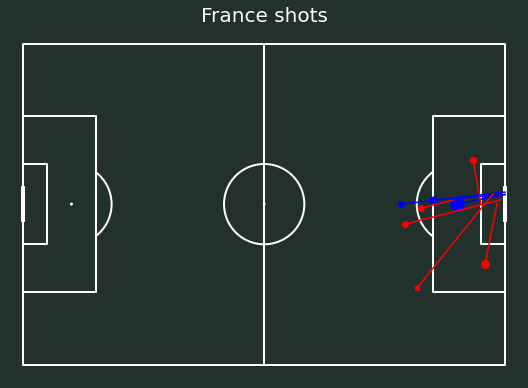

In [7]:
fig, ax = plt.subplots(figsize = (10, 6.5))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')
pitch = Pitch(pitch_type = 'statsbomb',orientation ='horizontal',view = 'half',positional = False,constrained_layout = False,tight_layout=False,pitch_color='#22312b', line_color='white',
              stripe=False)  # optional stripes
pitch.draw(ax = ax)
#plt.gca().invert_yaxis()
for x in range(len(france_shots['id'])):
    if france_shots['period'].iloc[x] == 1 or france_shots['period'].iloc[x] == 2:
        size = np.sqrt(france_shots['shot_statsbomb_xg'].iloc[x])*200
        if france_shots['shot_outcome_name'].iloc[x] == 'Goal':
            plt.plot((france_shots['location'].iloc[x][0],france_shots['shot_end_location'].iloc[x][0]), 
                     (france_shots['location'].iloc[x][1],france_shots['shot_end_location'].iloc[x][1]),color = 'blue')
            plt.scatter((france_shots['location'].iloc[x][0]),(france_shots['location'].iloc[x][1]),s = size, color = 'blue')
        else:
            plt.plot((france_shots['location'].iloc[x][0],france_shots['shot_end_location'].iloc[x][0]), 
                     (france_shots['location'].iloc[x][1],france_shots['shot_end_location'].iloc[x][1]),color = 'red')
            plt.scatter((france_shots['location'].iloc[x][0]),(france_shots['location'].iloc[x][1]),s = size, color = 'red')
plt.title('France shots',color = 'white', size = 20)

In [8]:
croatia_shots = df.loc[(df['type_name']== 'Shot') & (df['team_name']=='Croatia')]
croatia_shots.head()

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,carry_end_location,under_pressure,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,duel_type_id,duel_type_name,pass_aerial_won,duel_outcome_id,duel_outcome_name,counterpress,interception_outcome_id,interception_outcome_name,pass_switch,pass_cross,dribble_outcome_id,dribble_outcome_name,foul_committed_type_id,foul_committed_type_name,foul_won_defensive,clearance_aerial_won,ball_recovery_recovery_failure,foul_committed_advantage,foul_won_advantage,injury_stoppage_in_chain,pass_backheel,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_technique_id,shot_technique_name,shot_type_id,shot_type_name,shot_outcome_id,shot_outcome_name,shot_body_part_id,shot_body_part_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_outcome_id,goalkeeper_outcome_name,foul_committed_card_id,foul_committed_card_name,pass_goal_assist,shot_deflected,block_deflection,foul_committed_penalty,pass_cut_back,shot_aerial_won,shot_first_time,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_body_part_id,goalkeeper_body_part_name,pass_deflected,dribble_overrun,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name
723,cfdb23f5-0247-4f10-9641-8ac06824722f,724,1,00:20:51.227,20,51,43,1.013,16,Shot,785,Croatia,3,From Free Kick,785,Croatia,NaN,NaN,[d8e239af-b66d-475c-a719-b46c418d8a49],"[112.0, 49.0]",5468.0,Domagoj Vida,5.0,Left Center Back,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.041081,"[119.0, 36.6, 5.0]",f66011e2-0cbf-46b9-b845-4d759c0c34ae,93.0,Normal,87.0,Open Play,98.0,Off T,37.0,Head,"[{'location': [120.0, 42.0], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
792,2776f49c-73a8-4185-bcce-9cbef244cf3c,793,1,00:23:34.907,23,34,49,2.053,16,Shot,785,Croatia,3,From Free Kick,785,Croatia,NaN,NaN,[c0201b3a-c444-4179-a42a-324d928d7a38],"[108.0, 29.0]",5470.0,Ivan Rakitić,15.0,Left Center Midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.066235,"[120.0, 47.5, 6.4]",efc066fd-75c1-4744-b7fc-070cf6c8c293,95.0,Volley,87.0,Open Play,98.0,Off T,38.0,Left Foot,"[{'location': [120.0, 40.0], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
910,dd524196-386d-4759-b40b-e920cc77b059,911,1,00:27:53.880,27,53,58,0.587,16,Shot,785,Croatia,3,From Free Kick,785,Croatia,NaN,NaN,[c0291f7e-a0c0-43c9-8bd3-a60120fdc946],"[105.0, 32.0]",5474.0,Ivan Perišić,21.0,Left Wing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.063829,"[120.0, 43.6, 0.8]",239d4230-e8d1-4e17-b9dd-b7f57faf3ecb,91.0,Half Volley,87.0,Open Play,97.0,Goal,38.0,Left Foot,"[{'location': [120.0, 40.0], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1076,b99d698f-5891-402b-b5cf-33ca81e1554f,1077,1,00:39:25.267,39,25,74,1.000,16,Shot,785,Croatia,1,Regular Play,785,Croatia,NaN,NaN,[b365fe25-80c3-481c-81cb-c7de657e9d61],"[108.0, 41.0]",5465.0,Ante Rebić,17.0,Right Wing,

Text(0.5, 1.0, 'croatia shots')

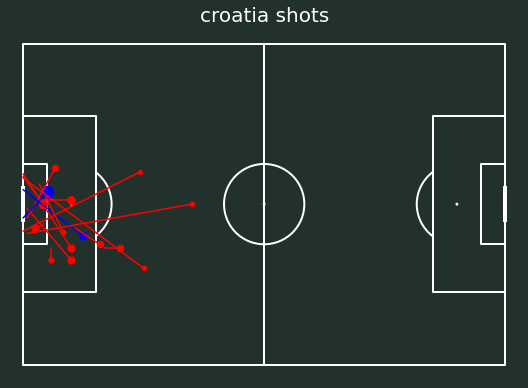

In [20]:
fig, ax = plt.subplots(figsize = (10, 6.5))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')
pitch = Pitch(pitch_type = 'statsbomb',orientation ='horizontal',view = 'half',positional = False,constrained_layout = False,tight_layout=False,pitch_color='#22312b', line_color='white',
              stripe=False)  # optional stripes
pitch.draw(ax = ax)
for x in range(len(croatia_shots['id'])):
    if croatia_shots['period'].iloc[x] == 1 or croatia_shots['period'].iloc[x] == 2:
        size = np.sqrt(croatia_shots['shot_statsbomb_xg'].iloc[x])*200
        if croatia_shots['shot_outcome_name'].iloc[x] == 'Goal':
            plt.plot((120-croatia_shots['location'].iloc[x][0],120-croatia_shots['shot_end_location'].iloc[x][0]), 
                     (80-croatia_shots['location'].iloc[x][1],80-croatia_shots['shot_end_location'].iloc[x][1]),color = 'blue')
            plt.scatter((120-croatia_shots['location'].iloc[x][0]),(80-croatia_shots['location'].iloc[x][1]),s = size, color = 'blue')
        else:
            plt.plot((120-croatia_shots['location'].iloc[x][0],120-croatia_shots['shot_end_location'].iloc[x][0]), 
                     (80-croatia_shots['location'].iloc[x][1],80-croatia_shots['shot_end_location'].iloc[x][1]),color = 'red')
            plt.scatter((120-croatia_shots['location'].iloc[x][0]),(80-croatia_shots['location'].iloc[x][1]),s = size, color = 'red')
plt.title('croatia shots',color = 'white', size = 20)

Text(0.5, 1.0, 'France shots:right & croatia shots:Left')

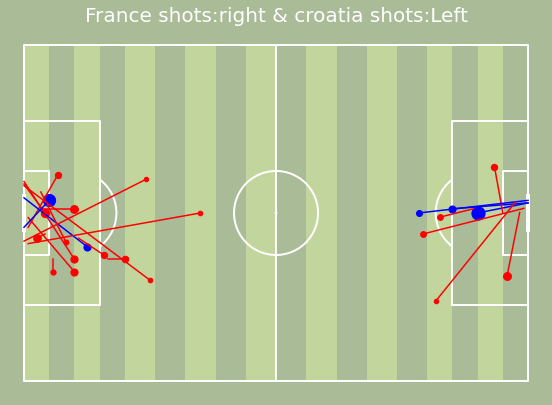

In [17]:
fig, ax = plt.subplots(figsize = (10, 6.8))
fig.set_facecolor('#aabb97')
ax.patch.set_facecolor('#aabb97')
pitch = Pitch(pitch_type = 'statsbomb',orientation ='horizontal',view = 'half',positional = False,constrained_layout = False,tight_layout=False,pitch_color='#aabb97', line_color='white',
              stripe=True,stripe_color='#c2d59d')
  # optional stripes
pitch.draw(ax = ax)
#plt.gca().invert_yaxis()
for x in range(len(france_shots['id'])):
    if france_shots['period'].iloc[x] == 1 or france_shots['period'].iloc[x] == 2:
        size = np.sqrt(france_shots['shot_statsbomb_xg'].iloc[x])*200
        if france_shots['shot_outcome_name'].iloc[x] == 'Goal':
            plt.plot((france_shots['location'].iloc[x][0],france_shots['shot_end_location'].iloc[x][0]), 
                     (france_shots['location'].iloc[x][1],france_shots['shot_end_location'].iloc[x][1]),color = 'blue')
            plt.scatter((france_shots['location'].iloc[x][0]),(france_shots['location'].iloc[x][1]),s = size, color = 'blue')
        else:
            plt.plot((france_shots['location'].iloc[x][0],france_shots['shot_end_location'].iloc[x][0]), 
                     (france_shots['location'].iloc[x][1],france_shots['shot_end_location'].iloc[x][1]),color = 'red')
            plt.scatter((france_shots['location'].iloc[x][0]),(france_shots['location'].iloc[x][1]),s = size, color = 'red')
            
for x in range(len(croatia_shots['id'])):
    if croatia_shots['period'].iloc[x] == 1 or croatia_shots['period'].iloc[x] == 2:
        size = np.sqrt(croatia_shots['shot_statsbomb_xg'].iloc[x])*200
        if croatia_shots['shot_outcome_name'].iloc[x] == 'Goal':
            plt.plot((120-croatia_shots['location'].iloc[x][0],120-croatia_shots['shot_end_location'].iloc[x][0]), 
                     (80-croatia_shots['location'].iloc[x][1],80-croatia_shots['shot_end_location'].iloc[x][1]),color = 'blue')
            plt.scatter((120-croatia_shots['location'].iloc[x][0]),(80-croatia_shots['location'].iloc[x][1]),s = size, color = 'blue')
        else:
            plt.plot((120-croatia_shots['location'].iloc[x][0],120-croatia_shots['shot_end_location'].iloc[x][0]), 
                     (80-croatia_shots['location'].iloc[x][1],80-croatia_shots['shot_end_location'].iloc[x][1]),color = 'red')
            plt.scatter((120-croatia_shots['location'].iloc[x][0]),(80-croatia_shots['location'].iloc[x][1]),s = size, color = 'red')   
            
plt.title('France shots:right & croatia shots:Left',color = 'white', size = 20)